In [1]:
import dicom2nifti
import nibabel as nb
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [21]:
#  use icometrix dicom2nifti to convert dicom to nifti
def make_load_nifti(dicom_dir):
    os.chdir(dicom_dir)
    nifti_fname = os.path.join(dicom_dir, 'nifti.nii.gz')
    nifti_out = dicom2nifti.dicom_series_to_nifti(dicom_dir, nifti_fname, reorient_nifti=True)
    # out contains dict with file info
    nifti_img = nb.load(nifti_out['NII_FILE'])
    nifti_img_data = nifti_img.get_fdata()
    nifti_img_data.shape
    return nifti_img_data

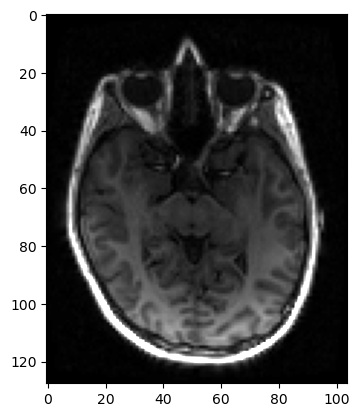

In [43]:
#dell laptop (Win)
# WAND IRSPGR data - poor dynamic range in this image.  Note that the maximum white level set in the image display is 
# only 100 in this case, c.f. 4095 as the DICOM image maximum and that used in later examples.
dicom_data_dir = 'c:\data\mr_training_data\wand_irspgr'
nifti_dat = make_load_nifti(dicom_data_dir)
%matplotlib inline
plt.imshow(np.rot90(nifti_dat[:,:,50]), cmap='gray', vmin=0, vmax=100)

(0.0, 200000.0)

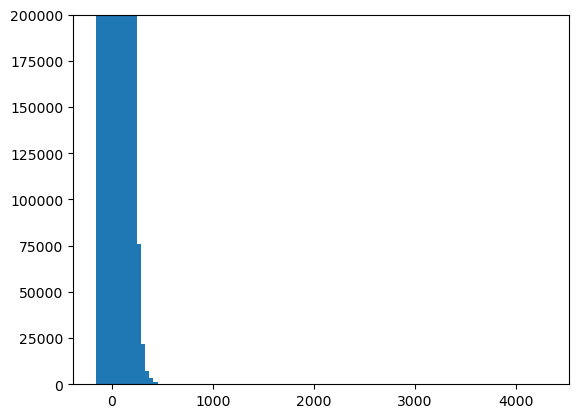

In [44]:
# no indication of saturation, but all signal is contained within a relatively small number of bins, meaning that the data
# insensitive to small changes in signal.
histo = np.histogram(nifti_dat, bins=100, range=(0,4095))
fig1 = plt.bar( histo[1][1:], histo[0], width=409)
plt.ylim(0,0.2e6)

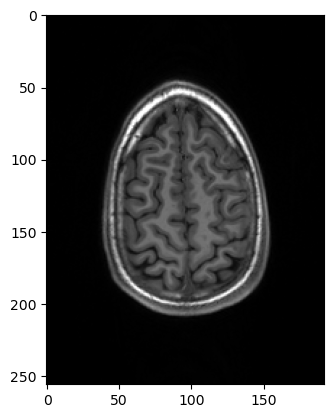

In [47]:
# MPRAGE - OK
dicom_data_dir2 = 'c:\data\mr_training_data\iscf_mprage'
mpr = make_load_nifti(dicom_data_dir2)
%matplotlib inline
plt.imshow(np.rot90(mpr[:,:,180]), cmap='gray', vmin=0, vmax=4096)

(0.0, 200000.0)

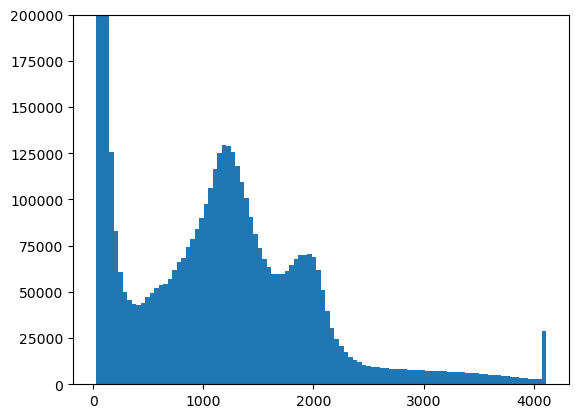

In [35]:
# image looks OK, however the histogram shows an indication that there is some saturation in the image
# as seen from the peak in the 4095 bin. 
histo = np.histogram(mpr, bins=100, range=(0,4095))
plt.bar( histo[1][1:], histo[0], width=40.95)
plt.ylim(0,0.2e6)

In [25]:
dicom_data_dir3 = 'c:\data\mr_training_data\iscf_BOLD'
bold = make_load_nifti(dicom_data_dir3)
bold.shape

(110, 110, 66, 9)

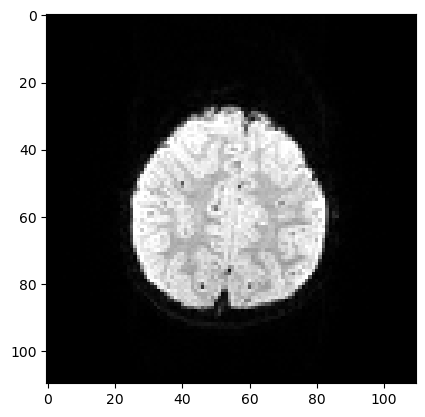

In [29]:
#  here, there is saturation in the image suggested by the consistently high white level in the image
%matplotlib inline
plt.imshow(np.rot90(bold[:,:,50,0]), cmap='gray', vmin=0, vmax=4096)

(0.0, 200000.0)

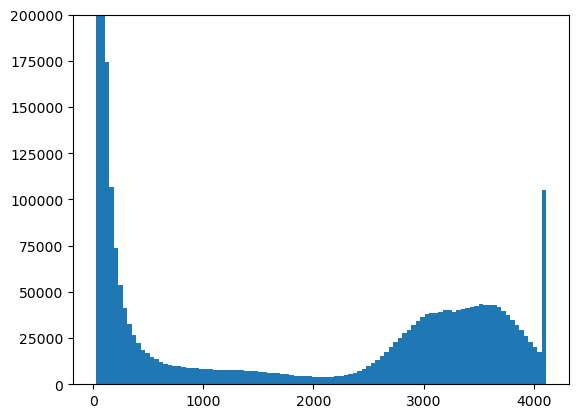

In [36]:
# this is confirmed by a significant peak in the 4095 bin in the histogram
histo = np.histogram(bold, bins=100, range=(0,4095))
fig1 = plt.bar( histo[1][1:], histo[0], width=40.95)
plt.ylim(0,0.2e6)